In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-quality-data-in-brooklyn-ny-openaq-2025/stations.csv
/kaggle/input/air-quality-data-in-brooklyn-ny-openaq-2025/README.md.txt
/kaggle/input/air-quality-data-in-brooklyn-ny-openaq-2025/measurements.csv


In [47]:
df_station = pd.read_csv('/kaggle/input/air-quality-data-in-brooklyn-ny-openaq-2025/stations.csv')
df_station

,station_id,station_name,latitude,longitude,sensor_type,source
0,3041962,\tNear Bay 50 St,40.588746,-73.983823,\t\nAir sensor\nStationary,OpenAQ
1,648,Bklyn - PS 314,40.641819,-74.018707,\t\nReference grade\nStationary,OpenAQ


In [48]:
df_measurement = pd.read_csv('/kaggle/input/air-quality-data-in-brooklyn-ny-openaq-2025/measurements.csv')
df_measurement

,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,3041962,Near Bay 50 St,pm25,41.125,µg/m³,2025-08-01T01:00:00Z,2025-07-31T21:00:00-04:00,America/New_York,40.5887458,-73.9838231,NaN,NaN,NaN,Sebastian,AirGradient
1,3041962,Near Bay 50 St,pm25,46.66666667,µg/m³,2025-08-01T02:00:00Z,2025-07-31T22:00:00-04:00,America/New_York,40.5887458,-73.9838231,NaN,NaN,NaN,Sebastian,AirGradient
2,3041962,Near Bay 50 St,pm25,46.25,µg/m³,2025-08-01T03:00:00Z,2025-07-31T23:00:00-04:00,America/New_York,40.5887458,-73.9838231,NaN,NaN,NaN,Sebastian,AirGradient
3,3041962,Near Bay 50 St,pm25,43.875,µg/m³,2025-08-01T04:00:00Z,2025-08-01T00:00:00-04:00,America/New_York,40.5887458,-73.9838231,NaN,NaN,NaN,Sebastian,AirGradient
4,3041962,Near Bay 50 St,pm25,27.5,µg/m³,2025-08-01T05:00:00Z,2025-08-01T01:00:00-04:00,America/New_York,40.5887458,-73.9838231,NaN,NaN,NaN,Sebastian,AirGradient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,648,Bklyn - PS 314,pm25,4.9,µg/m³,2025-08-29T20:00:00Z,2025-08-29T16:00:00-04:00,America/New_York,40.641819,-74.018707,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
1388,648,Bklyn - PS 314,pm25,4,µg/m³,2025-08-29T21:00:00Z,2025-08-29T17:00:00-04:00,America/New_York,40.641819,-74.018707,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
1389,648,Bklyn - PS 314,pm25,3.8,µg/m³,2025-08-29T22:00:00Z,2025-08-29T18:00:00-04:00,America/New_York,40.641819,-74.018707,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
1390,648,Bklyn - PS 314,pm25,3.9,µg/m³,2025-08-29T23:00:00Z,2025-08-29T19:00:00-04:00,America/New_York,40.641819,-74.018707,NaN,NaN,NaN,Unknown Governmental Organization,AirNow


In [49]:
df_measurement.describe()

,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
count,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392,1,1,1,1392,1392
unique,3,3,2,654,2,697,697,2,3,3,1,1,1,3,3
top,3041962,Near Bay 50 St,pm25,6.2,µg/m³,2025-08-01T01:00:00Z,2025-07-31T21:00:00-04:00,America/New_York,40.5887458,-73.9838231,country_iso,isMobile,isMonitor,Sebastian,AirGradient
freq,696,696,1391,21,1391,2,2,1391,696,696,1,1,1,696,696


In [50]:
df_measurement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   location_id    1392 non-null   object
 1   location_name  1392 non-null   object
 2   parameter      1392 non-null   object
 3   value          1392 non-null   object
 4   unit           1392 non-null   object
 5   datetimeUtc    1392 non-null   object
 6   datetimeLocal  1392 non-null   object
 7   timezone       1392 non-null   object
 8   latitude       1392 non-null   object
 9   longitude      1392 non-null   object
 10  country_iso    1 non-null      object
 11  isMobile       1 non-null      object
 12  isMonitor      1 non-null      object
 13  owner_name     1392 non-null   object
 14  provider       1392 non-null   object
dtypes: object(15)
memory usage: 163.3+ KB


In [51]:
# Filter first, then explicitly copy to avoid SettingWithCopyWarning
df = df_measurement[df_measurement['parameter'] == 'pm25'].copy()

# Ensure datetime is parsed correctly
df['datetimeUtc'] = pd.to_datetime(df['datetimeUtc'], errors='coerce')

# Ensure PM2.5 values are numeric
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Pivot to get separate columns for each station
station_data = df.pivot_table(
    index='datetimeUtc',
    columns='location_name',
    values='value'
)


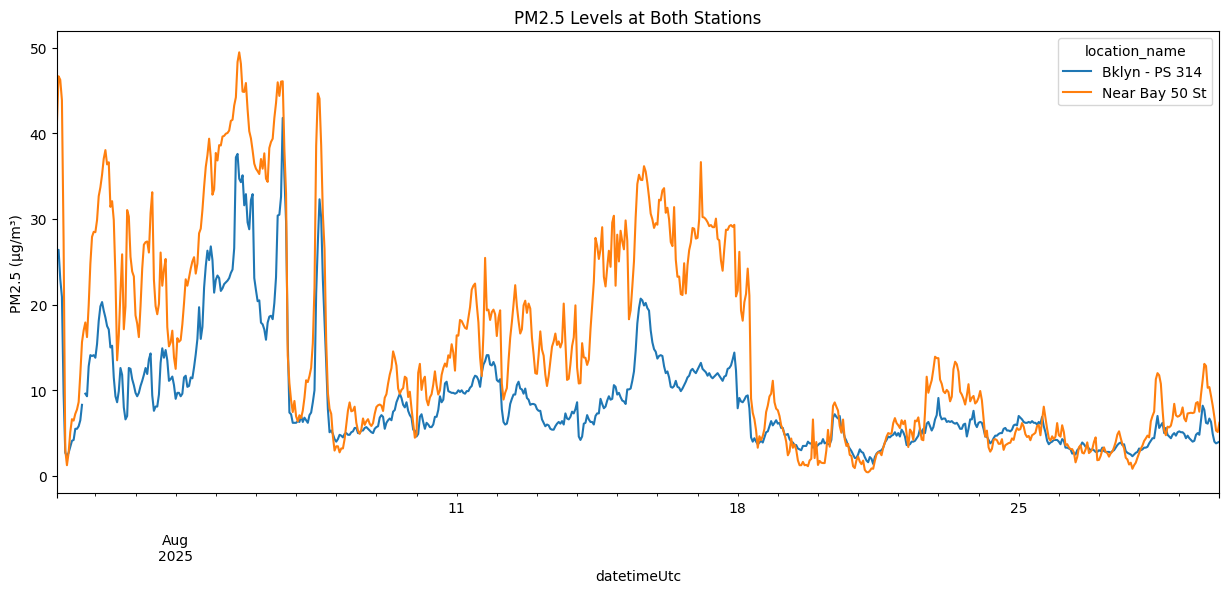

In [52]:
import matplotlib.pyplot as plt

station_data.plot(figsize=(15,6))
plt.title("PM2.5 Levels at Both Stations")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()


**The graph shows that the values are relatively similar.**

# Statistical Analysis

In [53]:
corr = station_data.corr().iloc[0,1]
print(f"Correlation between stations: {corr:.3f}")


Correlation between stations: 0.902


If close to 1.0 → patterns move together.

If near 0 → no relation.

If negative → when one goes up, the other goes down.

**This proves that the nearness is significant.**

In [54]:
means = station_data.mean()
print(means)
higher_station = means.idxmax()
print(f"Station with higher average PM2.5: {higher_station}")

location_name
Bklyn - PS 314     8.937698
Near Bay 50 St    15.159765
dtype: float64
Station with higher average PM2.5: Near Bay 50 St


**Similarly, the avgs have a bit of difference.**

# Machine Learning

In [55]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

station1 = station_data.iloc[:,0].values.reshape(-1,1)
station2 = station_data.iloc[:,1].values

# Drop NaNs (both sides must be valid)
mask = ~np.isnan(station1.ravel()) & ~np.isnan(station2)
X = station1[mask]
y = station2[mask]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("Regression slope:", model.coef_[0])
print("Regression intercept:", model.intercept_)

R² score: 0.7943096093368782
RMSE: 5.715271155940903
Regression slope: 1.6788516644897755
Regression intercept: 0.08136863496703128


**R² score = 0.794. This is quite high, meaning the two stations’ air patterns are strongly related, though not perfectly identical.**

**RMSE ≈ 5.72 µg/m³. Considering typical PM 2.5 values in the 0–50 µg/m³ range, This is moderate error.
Outliers or spikes in pollution might be contributing to the error.**

**Regression slope ≈ 1.68. This indicates that Station 2 generally experiences higher pollution levels than Station 1, assuming linear relationship.**

**Regression intercept ≈ 0.08. Close to zero, so baseline PM2.5 is almost the same when Station 1 is very low.**

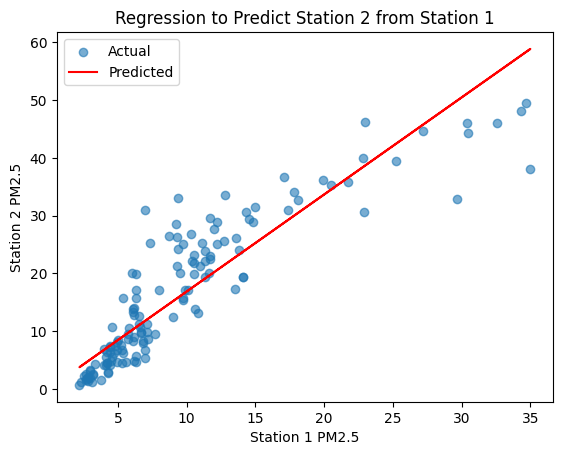

In [57]:
plt.scatter(X_test, y_test, label="Actual", alpha=0.6)
plt.plot(X_test, y_pred, color='red', label="Predicted")
plt.xlabel("Station 1 PM2.5")
plt.ylabel("Station 2 PM2.5")
plt.title("Regression to Predict Station 2 from Station 1")
plt.legend()
plt.show()

**A few anomalies can be spotted but most data are in linear form.**

# Residual Plot

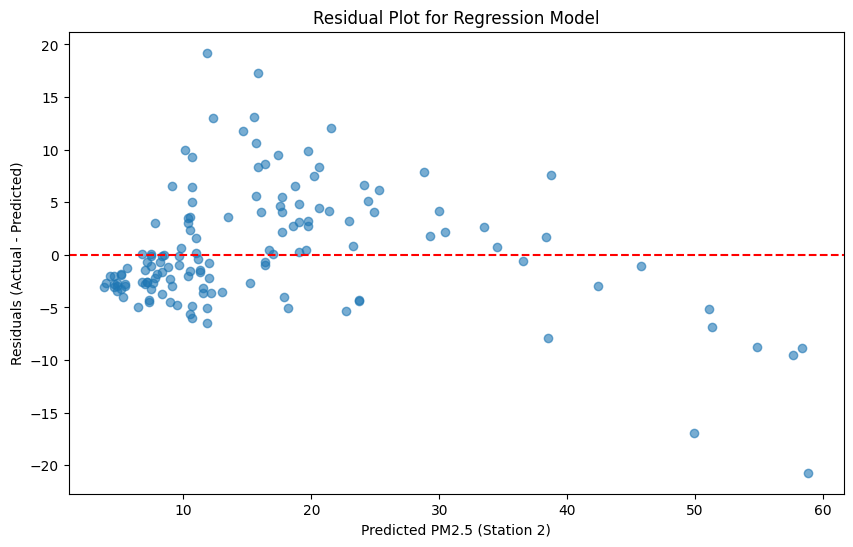

In [58]:
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted PM2.5 (Station 2)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for Regression Model")
plt.show()

**Linear Regression provides a decent enough overview but it still contains a few anomalies causing a few differences. Those anomalies are spotted below.**

# Anomaly Detection

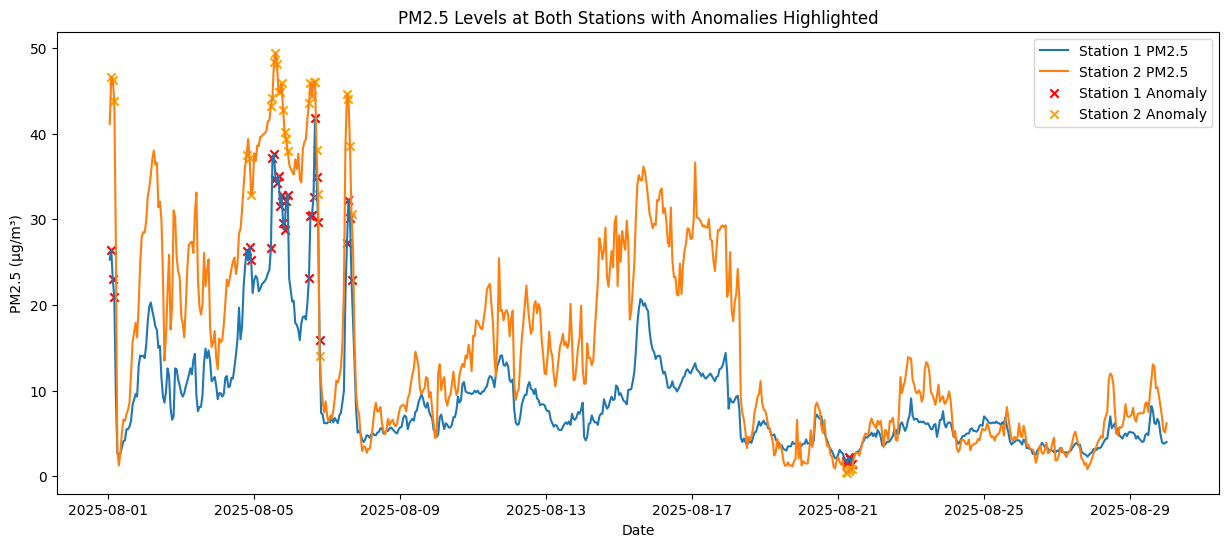

In [59]:
# Plot both stations
plt.figure(figsize=(15,6))
plt.plot(station_data_clean.index, station_data_clean.iloc[:,0], label="Station 1 PM2.5")
plt.plot(station_data_clean.index, station_data_clean.iloc[:,1], label="Station 2 PM2.5")

# Highlight anomalies (both stations) in red
anomalies = station_data_clean['anomaly'] == -1
plt.scatter(
    station_data_clean.index[anomalies],
    station_data_clean.iloc[:,0][anomalies],
    color='red', label='Station 1 Anomaly', marker='x'
)
plt.scatter(
    station_data_clean.index[anomalies],
    station_data_clean.iloc[:,1][anomalies],
    color='orange', label='Station 2 Anomaly', marker='x'
)

plt.title("PM2.5 Levels at Both Stations with Anomalies Highlighted")
plt.ylabel("PM2.5 (µg/m³)")
plt.xlabel("Date")
plt.legend()
plt.show()


**Can spot a number of anomalies proving that most of the air quality in both stations are similar barring some cases due to change in location.**

**With both statistical analysis and machine learning in place, the results are quite similar.**